In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
from google.colab.data_table import DataTable
DataTable.max_columns = 40

In [195]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [178]:
train_data = pd.read_csv("/content/drive/MyDrive/ml_mai/train.csv")
test_data = pd.read_csv("/content/drive/MyDrive/ml_mai/test.csv")

In [179]:
train_data = train_data.drop('ApplicationDate', axis = 1) # эта колонка не несет полезной информации и будет мешать в последущей предобработке
test_data = test_data.drop('ApplicationDate', axis = 1)

In [72]:
train_data.isna().sum() # выявили наличие пропусков

,0
Age,530
AnnualIncome,530
CreditScore,1031
LoanAmount,1031
LoanDuration,530
MaritalStatus,530
NumberOfDependents,530
HomeOwnershipStatus,530
MonthlyDebtPayments,1031
CreditCardUtilizationRate,530


In [28]:
train_data.info() # узнали типы данных в колонке для последующей работы с пропусками

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11017 entries, 0 to 11016
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         10487 non-null  float64
 1   AnnualIncome                10487 non-null  float64
 2   CreditScore                 9986 non-null   float64
 3   LoanAmount                  9986 non-null   float64
 4   LoanDuration                10487 non-null  float64
 5   MaritalStatus               10487 non-null  object 
 6   NumberOfDependents          10487 non-null  float64
 7   HomeOwnershipStatus         10487 non-null  object 
 8   MonthlyDebtPayments         9986 non-null   float64
 9   CreditCardUtilizationRate   10487 non-null  float64
 10  NumberOfOpenCreditLines     10487 non-null  float64
 11  NumberOfCreditInquiries     10487 non-null  float64
 12  DebtToIncomeRatio           10487 non-null  float64
 13  BankruptcyHistory           998

In [180]:
float_features = train_data.select_dtypes(include=[np.number]).columns.to_list() # замена NaN на медиану в числовых признаках
float_features.remove('RiskScore')
for col in float_features:
    train_data[col].fillna(train_data[col].median(), inplace=True)
    test_data[col].fillna(test_data[col].median(), inplace=True)
train_data['RiskScore'].fillna(train_data[col].median(), inplace=True)

<ipython-input-180-318d0d108cbf>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data[col].fillna(train_data[col].median(), inplace=True)
<ipython-input-180-318d0d108cbf>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

In [181]:
categorical_features = train_data.select_dtypes(include=[object]).columns.to_list() # замена NaN на 'Unknown' в категориальных признаках
for col in categorical_features:
    train_data[col].fillna('Unknown', inplace=True)
    test_data[col].fillna('Unknown', inplace=True)

<ipython-input-181-0c3aab8bc7ae>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data[col].fillna('Unknown', inplace=True)
<ipython-input-181-0c3aab8bc7ae>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

In [182]:
label_encoder = LabelEncoder() # преобразование категориальных признаков
for col in categorical_features:
    train_data[col] = label_encoder.fit_transform(train_data[col])
    test_data[col] = label_encoder.transform(test_data[col])

In [32]:
train_data.describe()

,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,MonthlyDebtPayments,CreditCardUtilizationRate,...,EmploymentStatus,EducationLevel,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
count,11017.000000,11017.000000,11017.000000,11017.000000,11017.000000,11017.000000,11017.000000,11017.000000,11017.000000,11017.000000,...,11017.000000,11017.000000,11017.000000,1.101700e+04,11017.000000,11017.000000,11017.000000,11017.000000,11017.000000,1.101700e+04
mean,39.857584,129539.798947,682.239403,29121.278706,53.178179,1.399746,1.540982,1.538259,532.565490,0.283331,...,0.313515,2.011618,17.598076,1.423710e+05,0.198673,0.199178,1056.824726,0.501250,0.535264,-2.446243e+04
std,11.331345,113338.900942,167.293860,26481.062533,23.925423,0.962511,1.389469,1.367021,479.866528,0.155435,...,0.763591,1.455666,11.061976,4.416089e+05,0.090022,0.094200,1313.985654,0.875867,0.498778,1.396821e+06
min,18.000000,15000.000000,300.000000,1063.000000,12.000000,0.000000,0.000000,0.000000,13.000000,0.003674,...,0.000000,0.000000,0.000000,1.004000e+03,0.052494,0.046445,30.008506,0.006064,0.000000,-9.999999e+06
25%,32.000000,23712.000000,571.000000,13611.000000,36.000000,1.000000,0.000000,0.000000,248.000000,0.164019,...,0.000000,1.000000,9.000000,7.893000e+03,0.125079,0.121904,387.986235,0.069591,0.000000,3.147369e+01
50%,40.000000,89015.000000,722.500000,21828.500000,48.000000,1.000000,1.000000,2.000000,398.000000,0.262229,...,0.000000,3.000000,17.000000,2.742950e+04,0.182023,0.180710,684.878529,0.178193,1.000000,4.220860e+01
75%,47.000000,241910.000000,850.000000,34854.000000,60.000000,2.000000,2.000000,3.000000,638.000000,0.384101,...,0.000000,3.000000,25.000000,1.060430e+05,0.254760,0.260614,1227.394280,0.596358,1.000000,6.468024e+01
max,80.000000,748508.000000,850.000000,418997.000000,120.000000,4.000000,6.000000,4.000000,10879.000000,0.914635,...,3.000000,5.000000,57.000000,1.126117e+07,0.722497,0.833647,29634.807816,24.383046,1.000000,1.000000e+07


Среднее значение и стандартные отклонения по колонкам отличаются. Следовательно, требуется нормализация.

In [183]:
scaler = StandardScaler()
train_data[float_features] = scaler.fit_transform(train_data[float_features])
test_data[float_features] = scaler.transform(test_data[float_features])

In [93]:
train_data.describe()

,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,MonthlyDebtPayments,CreditCardUtilizationRate,...,EmploymentStatus,EducationLevel,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
count,1.101700e+04,1.101700e+04,1.101700e+04,1.101700e+04,1.101700e+04,11017.000000,1.101700e+04,11017.000000,1.101700e+04,1.101700e+04,...,11017.000000,11017.000000,1.101700e+04,1.101700e+04,1.101700e+04,1.101700e+04,1.101700e+04,1.101700e+04,1.101700e+04,1.101700e+04
mean,1.128665e-16,-5.933551e-17,8.061890e-17,7.739414e-17,1.109316e-16,1.399746,1.547883e-17,1.538259,1.547883e-17,-3.160261e-17,...,0.313515,2.011618,4.643649e-17,2.579805e-17,5.159610e-18,9.222802e-17,-2.063844e-17,8.126385e-17,1.547883e-17,-2.446243e+04
std,1.000045e+00,1.000045e+00,1.000045e+00,1.000045e+00,1.000045e+00,0.962511,1.000045e+00,1.367021,1.000045e+00,1.000045e+00,...,0.763591,1.455666,1.000045e+00,1.000045e+00,1.000045e+00,1.000045e+00,1.000045e+00,1.000045e+00,1.000045e+00,1.396821e+06
min,-1.929036e+00,-1.010642e+00,-2.284942e+00,-1.059608e+00,-1.721184e+00,0.000000,-1.109094e+00,0.000000,-1.082778e+00,-1.799274e+00,...,0.000000,0.000000,-1.590934e+00,-3.201327e-01,-1.623891e+00,-1.621439e+00,-7.814871e-01,-5.653922e-01,-1.073200e+00,-9.999999e+06
25%,-6.934693e-01,-9.337712e-01,-6.649643e-01,-5.857387e-01,-7.180211e-01,1.000000,-1.109094e+00,0.000000,-5.930366e-01,-7.676377e-01,...,0.000000,1.000000,-7.772993e-01,-3.045322e-01,-8.175510e-01,-8.203601e-01,-5.090382e-01,-4.928585e-01,-1.073200e+00,3.147369e+01
50%,1.256892e-02,-3.575704e-01,2.406689e-01,-2.754085e-01,-2.164398e-01,1.000000,-3.893623e-01,2.000000,-2.804355e-01,-1.357655e-01,...,0.000000,3.000000,-5.406836e-02,-2.602908e-01,-1.849706e-01,-1.960579e-01,-2.830800e-01,-3.688594e-01,9.317929e-01,4.220860e+01
75%,6.303524e-01,9.914981e-01,1.002835e+00,2.164936e-01,2.851415e-01,2.000000,3.303700e-01,3.000000,2.197263e-01,6.483386e-01,...,0.000000,3.000000,6.691626e-01,-8.226666e-02,6.230638e-01,6.522152e-01,1.298167e-01,1.085917e-01,9.317929e-01,6.468024e+01
max,3.542760e+00,5.461464e+00,1.002835e+00,1.472348e+01,2.793048e+00,4.000000,3.209299e+00,4.000000,2.156205e+01,4.061713e+00,...,3.000000,5.000000,3.562086e+00,2.517907e+01,5.819113e+00,6.735616e+00,2.175007e+01,2.726770e+01,9.317929e-01,1.000000e+07


Среднее отклонение теперь почти одинаковое.

<ipython-input-77-08f7fa38ba7e>:2: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


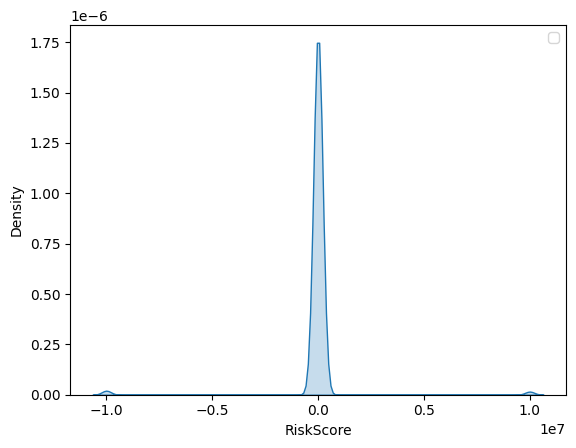

In [77]:
sns.kdeplot(train_data['RiskScore'], fill=True)
plt.legend()
plt.show()

Видны выбросы в RiskScore.

<Axes: xlabel='RiskScore', ylabel='Density'>

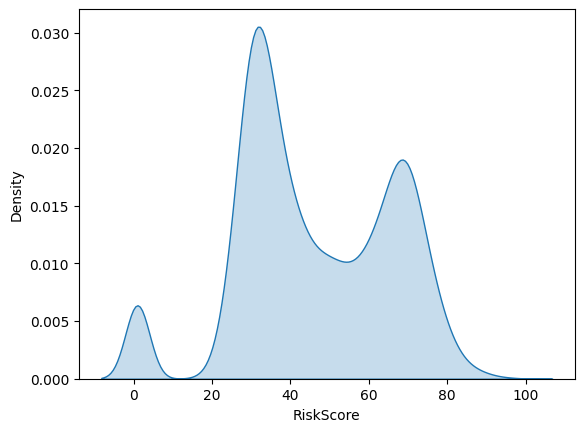

In [184]:
train_data = train_data.loc[abs(train_data['RiskScore']) < 1000000]
sns.kdeplot(train_data['RiskScore'], fill=True)

В датасете много признаков. Посмотрим их корреляцию.

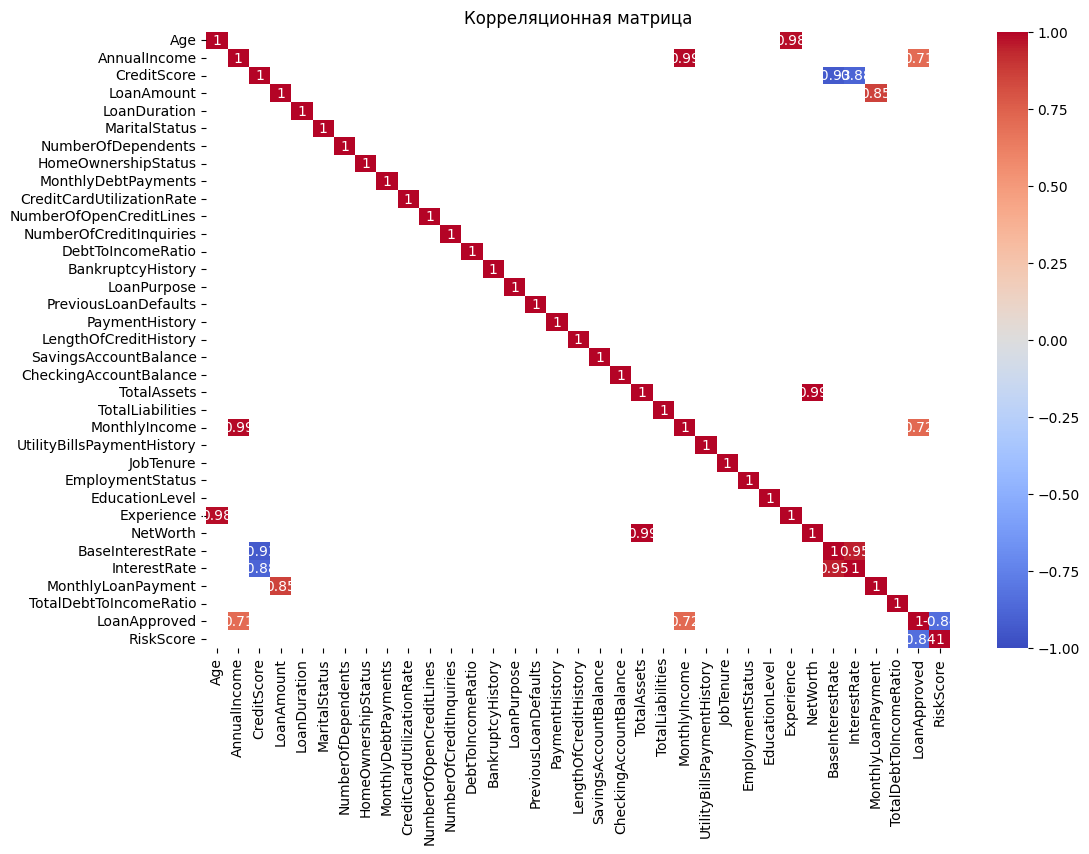

In [79]:
corr_matrix = train_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix[corr_matrix.abs() >= 0.7], annot=True,  cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Корреляционная матрица")
plt.show()

Создаем новые признаки, которые заменят по два коррелирующих признака.

In [185]:
train_data["LoanToIncomeRatio"] = train_data["LoanAmount"] / train_data["AnnualIncome"]
test_data["LoanToIncomeRatio"] = test_data["LoanAmount"] / test_data["AnnualIncome"]

train_data["DebtCoverageRatio"] = train_data["MonthlyIncome"] / (train_data["MonthlyDebtPayments"] + 1)
test_data["DebtCoverageRatio"] = test_data["MonthlyIncome"] / (test_data["MonthlyDebtPayments"] + 1)

Удаляем коррелирующие признаки.

In [186]:
train_data = train_data.drop(columns=["AnnualIncome", "MonthlyIncome", "MonthlyDebtPayments", "NetWorth", "Experience", "InterestRate", "BaseInterestRate"])

In [187]:
test_data = test_data.drop(columns=["AnnualIncome", "MonthlyIncome", "MonthlyDebtPayments", "NetWorth", "Experience", "InterestRate", "BaseInterestRate"])

# Задание 1
Написать класс, реализующий свой линейный классификатор и логистическую регрессию с методами fit и predict.

In [188]:
class MyLinearModel:
    def __init__(self, method="logistic", lr=0.01, n_iter=1000):
        self.method = method
        self.lr = lr
        self.n_iter = n_iter
        self.weights = None
        self.bias = None

    def sigmoid(self, x):
        x = np.clip(x, -500, 500)
        return 1 / (1 + np.exp(-x))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iter):
            linear_output = np.dot(X, self.weights) + self.bias

            if self.method == "logistic":
                predictions = self.sigmoid(linear_output)
                errors = y - predictions
                gradient_w = -np.dot(X.T, errors) / n_samples
                gradient_b = -np.sum(errors) / n_samples
            elif self.method == "linear":
                errors = y - linear_output
                gradient_w = -2 * np.dot(X.T, errors) / n_samples
                gradient_b = -2 * np.sum(errors) / n_samples
            else:
                raise ValueError("Unknown method. Choose 'logistic' or 'linear'.")

            self.weights -= self.lr * gradient_w
            self.bias -= self.lr * gradient_b

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        if self.method == "logistic":
            predictions = self.sigmoid(linear_output)
            return (predictions >= 0.5).astype(int)
        elif self.method == "linear":
            return linear_output

In [189]:
X_train = train_data.drop("LoanApproved", axis=1)
Y_train = train_data["LoanApproved"]
Y_train = (Y_train > 0).astype(int)
X_test = test_data.drop("LoanApproved", axis=1)
Y_test = test_data["LoanApproved"].round()
Y_test = (Y_test > 0).astype(int)

In [190]:
model = MyLinearModel()
model.fit(X_train, Y_train)
Y_pred = model.predict(test_data.drop("ID", axis=1))

In [191]:
accuracy_my = accuracy_score(Y_test, Y_pred)
precision_my = precision_score(Y_test, Y_pred)
recall_my = recall_score(Y_test, Y_pred)
f1_score_my = f1_score(Y_test, Y_pred)

print(f"Accurancy : {accuracy_my}")
print(f"Precision : {precision_my}")
print(f"Recall : {recall_my}")
print(f"F1_score : {f1_score_my}")

Accurancy : 0.565
Precision : 0.5427368421052632
Recall : 0.9988376598217745
F1_score : 0.7033146910380575


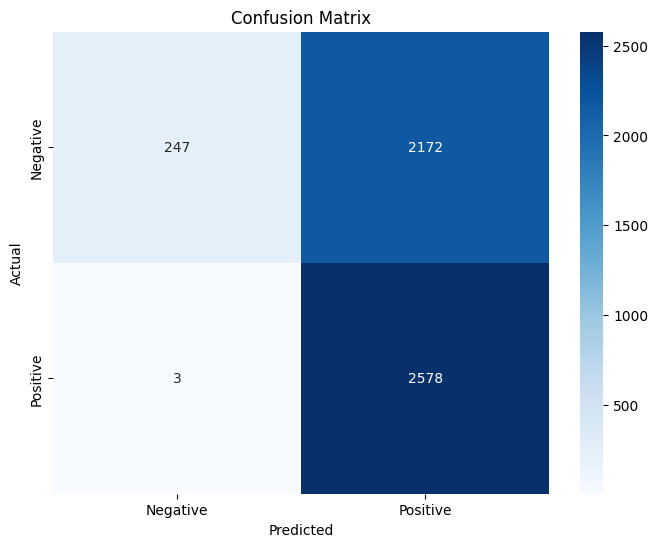

In [192]:
cm = confusion_matrix(Y_test, Y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Задание 2
Решить задачу с помощью готовых реализаций:
— Логистическая регрессия: sklearn
— SVM: sklearn
— Решающее дерево: sklearn
— Случайный лес: sklearn
— Градиентный бустинг: sklearn, LightGBM, XGBoost, catboost
# Задание 3
 Посчитать метрики precision, recall, F1-меру, accuracy для всех решений, визуализировать confusion matrix

In [197]:
X_train = X_train.drop('RiskScore', axis=1)
X_test = X_test.drop('ID', axis=1)

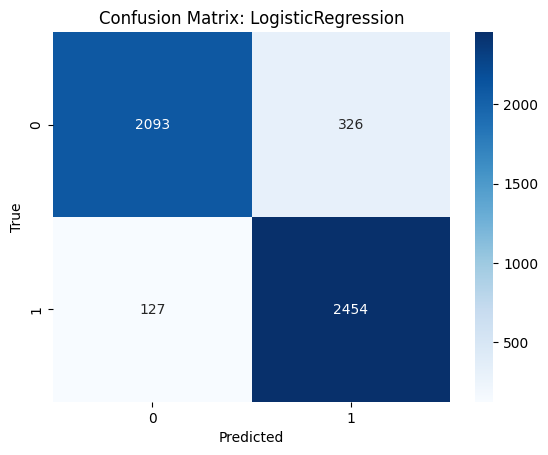

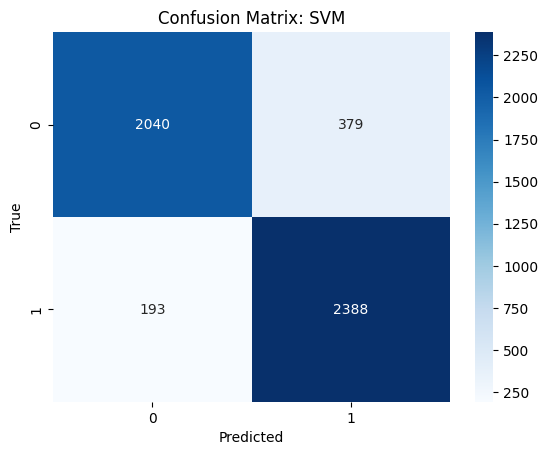

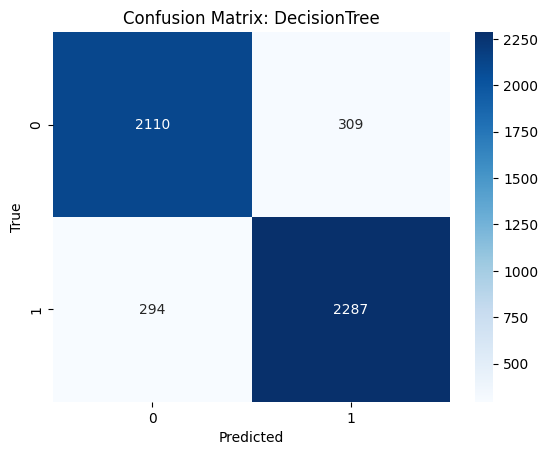

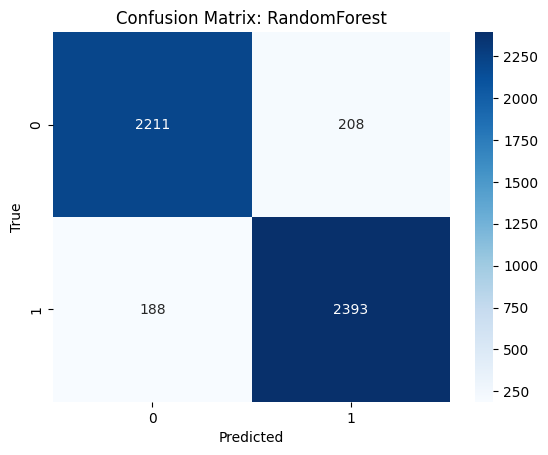

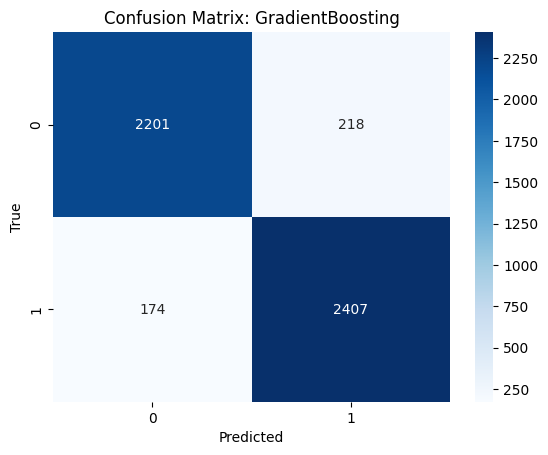

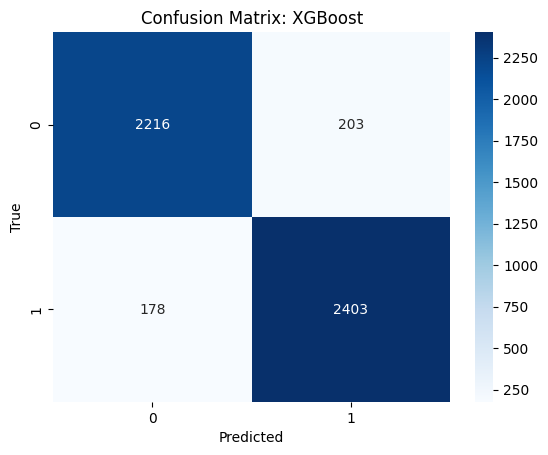

[LightGBM] [Info] Number of positive: 5787, number of negative: 5015
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001598 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3511
[LightGBM] [Info] Number of data points in the train set: 10802, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.535734 -> initscore=0.143181
[LightGBM] [Info] Start training from score 0.143181


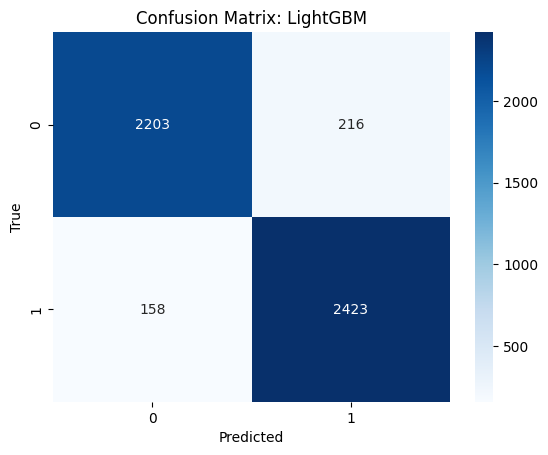

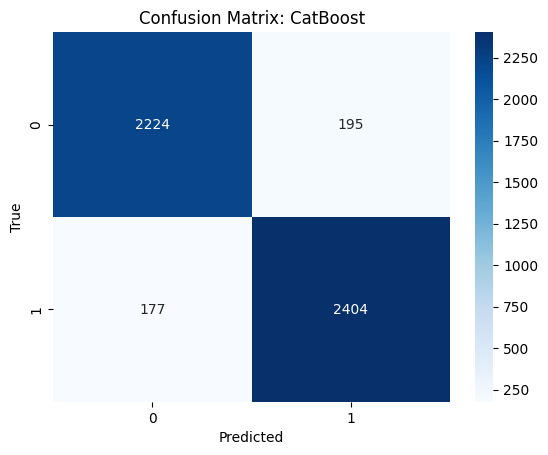

,LogisticRegression,SVM,DecisionTree,RandomForest,GradientBoosting,XGBoost,LightGBM,CatBoost
Precision,0.882734,0.863029,0.880971,0.920031,0.916952,0.922103,0.918151,0.924971
Recall,0.950794,0.925223,0.886091,0.927160,0.932584,0.931034,0.938783,0.931422
F1,0.915501,0.893044,0.883523,0.923582,0.924702,0.926547,0.928352,0.928185
Accuracy,0.909400,0.885600,0.879400,0.920800,0.921600,0.923800,0.925200,0.925600


In [199]:
models = {
    "LogisticRegression": LogisticRegression(max_iter=1000, random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "RandomForest": RandomForestClassifier(random_state=42),
    "GradientBoosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42),
    "LightGBM": LGBMClassifier(random_state=42),
    "CatBoost": CatBoostClassifier(verbose=False, random_state=42)
}

results = {}
for name, model in models.items():
    model.fit(X_train, Y_train)
    predictions = model.predict(X_test)
    precision = precision_score(Y_test, predictions)
    recall = recall_score(Y_test, predictions)
    f1 = f1_score(Y_test, predictions)
    accuracy = accuracy_score(Y_test, predictions)

    results[name] = {"Precision": precision, "Recall": recall, "F1": f1, "Accuracy": accuracy}

    cm = confusion_matrix(Y_test, predictions)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix: {name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

df_results = pd.DataFrame(results)
df_results

# Выводы
Был реализован класс, состоящий из линейного классификатора и логистической регрессии, на основе градиентного спуска. По данным метрик, он гораздо хуже справляется по сравнению с любой готовой реализацией, что нейдивительно, ведь я только учусь. Его можно улучшить, например, используя стохастический градиентный спуск. Но даже готовые реализации не могут дать стопроцентных presicion и recall. Наилучшие показатели метрик у LightGBM, CatBoost и XGBoost. Наихудшие - у DecisionTree. Наиболее информативной метрикой, на мой взляд, F1, так как она агрегирует в себе presicion и recall. Также хорошо использовать confusion matrix в сочетании с f1, так как она наглядно показывает качество предсказания модели.